## Linear Regression Example
We first import the requisite libraries, **matplotlib** for plotting, **numpy** for playing around with numerical data and **sklearn** for using the inbuilt implementations of the Linear Regression algorithm and also the gradient descent optimization to find the optimal parameters.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

We will be using the **diabetes dataset** for the purpose of this demonstration of Linear Regression algorithm. The dataset comes in-built as a part of the pre-installed datasets library.

In [2]:
diabetes = datasets.load_diabetes()

Before you ever jump into playing around with the data, check the datatype of the variable you're storing it into. This will help you be known with the rules of the game (operation you can carry out on the data).
In this case **diabetes** is a **sklearn dataset bunch variable**, don't be confused with the name. Just keep in mind that it's not a numpy or a pandas dataframe.

In [3]:
type(diabetes)

sklearn.datasets.base.Bunch

In [6]:
diabetes.data[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

We can see here that this is a **10** dimensional data. Though for the purpose of this illustration we'll just be using a single variable. Also, notice that **diabetes.data** is a numpy array.

In [7]:
type(diabetes.data)

numpy.ndarray

We use **np.newaxis** to add a dimension to the sliced data (this is because we need a 2-dimensional array to be fed into the linear regression model we create in the coming steps). **diabetes_X** is a numpy array.

In [8]:
diabetes_X = diabetes.data[:, np.newaxis, 2]

In [9]:
type(diabetes_X)

numpy.ndarray

Split the data into training/testing sets. Here, we have a total of **442 samples**. Say, we decide to train the linear regression model on 422 samples and predict on the remaining 20 in order to evaluate how well the model is doing (accuracy of the model).

In [10]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

We next split the outputs in exactly the similar fashion. **.target** gives us the **Y** value corresponding to each sample.

In [11]:
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

Now, we're done with the slicing and storing of data. What we need to do next is to create the model. Creating the model is a **2-step** process. In *Step 1* we create the linear regression object. And in *Step 2* we fit the model (train the model) on the training samples (*diabetes_X_train*).

In [12]:
# Step 1: Create linear regression object
regr = linear_model.LinearRegression()

In [13]:
# Step 2: Train the model using the training sets
    regr.fit(diabetes_X_train, diabetes_y_train)

/Users/karanrajwanshi/anaconda/lib/python3.5/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2))

Coefficients: 
 [ 938.23786125]
Intercept: 
 152.918861826
Mean squared error: 2548.07


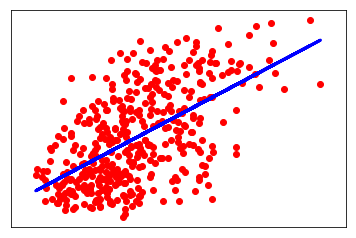

In [15]:
# Plot outputs (training set)
plt.scatter(diabetes_X_train, diabetes_y_train,  color='red')
plt.plot(diabetes_X_train, regr.predict(diabetes_X_train), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

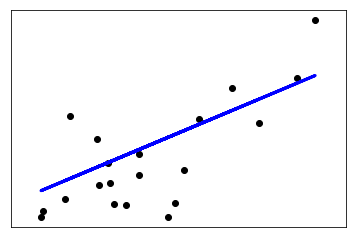

In [16]:
# Plot outputs (test set)
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, regr.predict(diabetes_X_test), color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
regr.predict(diabetes_X_test)-diabetes_

## Verifying what we learnt
Let's try and calculate the predicted value when *x =32* using both the inbuilt python predictor and our own knowledge of simple linear regression.
The model gives us the following value:

In [17]:
regr.predict(32)

array([ 30176.53042187])

We learnt that all we need to know is the value of parameters that defines the best line that fits the data. 
**y = theta_1 * x + theta_0**

In [18]:
regr.coef_*32 + regr.intercept_

array([ 30176.53042187])